#### **MMDetection 설치**

In [1]:
!pip install mmcv-full
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

     |████████████████████████████████| 324 kB 5.4 MB/s 
     |████████████████████████████████| 185 kB 37.5 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.14-cp37-cp37m-linux_x86_64.whl size=31303646 sha256=678c57d55f1a4a87074bc21f6cd7223b6871fd3bc79483f3bbf776812893dbc8
  Stored in directory: /root/.cache/pip/wheels/5e/54/62/69c99dc3c9937bca64126f81cbe315ae6c8e6e98c43fa7392d
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 21092, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 21092 (delta 0), reused 3 (delta 0), pack-reused 21087
Receiving objects: 100% (21092/21092), 24.81 MiB | 22.54 MiB/s, done.
Resolving deltas: 100% (14747/14747), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing t

In [1]:
from mmdet.apis import init_detector,inference_detector
import mmcv

#### **Oxford Pet Dataset 다운로드**

In [2]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2021-09-30 06:32:08--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz.1’

images.tar.gz.1     100%[===================>] 755.23M  29.0MB/s    in 27s     

2021-09-30 06:32:35 (28.2 MB/s) - ‘images.tar.gz.1’ saved [791918971/791918971]

--2021-09-30 06:32:35--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz.1’

annotations.tar.gz. 100%[===================>]  18.28M  14.1MB/s    in 1.3s    

2021-09-30 06:32:37 (

In [3]:
!mkdir /content/data
!tar -xvf images.tar.gz -C /content/data
!tar -xvf annotations.tar.gz -C /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian_190.png
annota

#### **이미지 디렉토리와 annotation 파일 살펴 보기**

In [4]:
!ls -lia ./data/images/Abyss*.jpg

3673781 -rwxr-xr-x 1 1001 1001 126923 Jun 18  2012 ./data/images/Abyssinian_100.jpg
3691755 -rwxr-xr-x 1 1001 1001  49023 Jun 18  2012 ./data/images/Abyssinian_101.jpg
3692831 -rwxr-xr-x 1 1001 1001 165505 Jun 18  2012 ./data/images/Abyssinian_102.jpg
3693603 -rwxr-xr-x 1 1001 1001 132937 Jun 18  2012 ./data/images/Abyssinian_103.jpg
3693753 -rwxr-xr-x 1 1001 1001  34907 Jun 18  2012 ./data/images/Abyssinian_104.jpg
3692134 -rwxr-xr-x 1 1001 1001 141823 Jun 18  2012 ./data/images/Abyssinian_105.jpg
3672864 -rwxr-xr-x 1 1001 1001 197092 Jun 18  2012 ./data/images/Abyssinian_106.jpg
3693644 -rwxr-xr-x 1 1001 1001 150955 Jun 18  2012 ./data/images/Abyssinian_107.jpg
3675156 -rwxr-xr-x 1 1001 1001 120641 Jun 18  2012 ./data/images/Abyssinian_108.jpg
3692123 -rwxr-xr-x 1 1001 1001  13601 Jun 18  2012 ./data/images/Abyssinian_109.jpg
3672324 -rwxr-xr-x 1 1001 1001  96294 Jun 18  2012 ./data/images/Abyssinian_10.jpg
3675109 -rwxr-xr-x 1 1001 1001  27734 Jun 18  2012 ./data/images/Abyssinian_1

In [5]:
!ls -lia ./data/images

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
3673608 -rwxr-xr-x 1 1001 1001   27987 Jun 18  2012 Egyptian_Mau_91.jpg
3695132 -rwxr-xr-x 1 1001 1001   31662 Jun 18  2012 Egyptian_Mau_92.jpg
3693768 -rwxr-xr-x 1 1001 1001   11833 Jun 18  2012 Egyptian_Mau_93.jpg
3674586 -rwxr-xr-x 1 1001 1001   13282 Jun 18  2012 Egyptian_Mau_94.jpg
3692755 -rwxr-xr-x 1 1001 1001   25425 Jun 18  2012 Egyptian_Mau_95.jpg
3672773 -rwxr-xr-x 1 1001 1001   22833 Jun 18  2012 Egyptian_Mau_96.jpg
3673102 -rwxr-xr-x 1 1001 1001  181499 Jun 18  2012 Egyptian_Mau_97.jpg
3690806 -rwxr-xr-x 1 1001 1001    8709 Jun 18  2012 Egyptian_Mau_98.jpg
3691012 -rwxr-xr-x 1 1001 1001   12394 Jun 18  2012 Egyptian_Mau_99.jpg
3692467 -rwxr-xr-x 1 1001 1001   48984 Jun 18  2012 Egyptian_Mau_9.jpg
3692608 -rwxr-xr-x 1 1001 1001  164254 Jun 18  2012 english_cocker_spaniel_100.jpg
3690921 -rwxr-xr-x 1 1001 1001  170083 Jun 18  2012 english_cocker_spaniel_101.jpg
3691516 -rwxr-xr-x 1 1001 1001  241519 Jun 18  2012 english_cocker_spaniel_102.

In [6]:
!cat ./data/annotations/xmls/Abyssinian_1.xml

<annotation><folder>OXIIIT</folder><filename>Abyssinian_1.jpg</filename><source><database>OXFORD-IIIT Pet Dataset</database><annotation>OXIIIT</annotation><image>flickr</image></source><size><width>600</width><height>400</height><depth>3</depth></size><segmented>0</segmented><object><name>cat</name><pose>Frontal</pose><truncated>0</truncated><occluded>0</occluded><bndbox><xmin>333</xmin><ymin>72</ymin><xmax>425</xmax><ymax>158</ymax></bndbox><difficult>0</difficult></object></annotation>


In [7]:
import glob
import xml.etree.ElementTree as ET

def get_bboxes_from_xml_test(xml_file):
  tree=ET.parse(xml_file)
  root=tree.getroot()
  bbox_names=[]
  bboxes=[]
  for obj in root.findall('object'):
    bbox_name=obj.find('name').text
    xmlbox=obj.find('bndbox')
    x1=int(xmlbox.find('xmin').text)
    y1=int(xmlbox.find('ymin').text)
    x2=int(xmlbox.find('xmax').text)
    y2=int(xmlbox.find('ymax').text)

    bbox_names.append(bbox_name)
    bboxes.append([x1,y1,x2,y2])

  return bbox_names,bboxes

get_bboxes_from_xml_test('./data/annotations/xmls/Abyssinian_1.xml')

(['cat'], [[333, 72, 425, 158]])

#### **trian,val image/annotation 메타 파일 보기**
* train과 valid 데이터로 나뉠 image와 annotation의 파일명을 가지는 메타 파일
* train과 valid용 meta 파일을 별도로 만듬

In [8]:
!cd ./data/annotations; cat trainval.txt

Abyssinian_100 1 1 1
Abyssinian_101 1 1 1
Abyssinian_102 1 1 1
Abyssinian_103 1 1 1
Abyssinian_104 1 1 1
Abyssinian_105 1 1 1
Abyssinian_106 1 1 1
Abyssinian_107 1 1 1
Abyssinian_108 1 1 1
Abyssinian_109 1 1 1
Abyssinian_10 1 1 1
Abyssinian_110 1 1 1
Abyssinian_111 1 1 1
Abyssinian_112 1 1 1
Abyssinian_113 1 1 1
Abyssinian_114 1 1 1
Abyssinian_115 1 1 1
Abyssinian_116 1 1 1
Abyssinian_117 1 1 1
Abyssinian_118 1 1 1
Abyssinian_119 1 1 1
Abyssinian_11 1 1 1
Abyssinian_120 1 1 1
Abyssinian_121 1 1 1
Abyssinian_122 1 1 1
Abyssinian_123 1 1 1
Abyssinian_124 1 1 1
Abyssinian_125 1 1 1
Abyssinian_126 1 1 1
Abyssinian_127 1 1 1
Abyssinian_128 1 1 1
Abyssinian_129 1 1 1
Abyssinian_12 1 1 1
Abyssinian_130 1 1 1
Abyssinian_131 1 1 1
Abyssinian_132 1 1 1
Abyssinian_133 1 1 1
Abyssinian_134 1 1 1
Abyssinian_135 1 1 1
Abyssinian_136 1 1 1
Abyssinian_137 1 1 1
Abyssinian_138 1 1 1
Abyssinian_139 1 1 1
Abyssinian_13 1 1 1
Abyssinian_140 1 1 1
Abyssinian_141 1 1 1
Abyssinian_142 1 1 1
Abyssinian_143 1 

In [9]:
import pandas as pd

pet_df=pd.read_csv('./data/annotations/trainval.txt',sep=' ',header=None,names=['img_name','class_id','etc1','etc2'])
pet_df.head()

,img_name,class_id,etc1,etc2
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [10]:
pet_df['class_id'].value_counts()

37    100
22    100
34    100
32    100
30    100
28    100
26    100
24    100
20    100
35    100
18    100
16    100
14    100
10    100
6     100
4     100
36    100
1     100
3     100
19    100
31    100
29    100
27    100
25    100
5     100
21    100
17    100
15    100
11    100
9     100
7     100
2     100
33     99
23     96
13     96
8      96
12     93
Name: class_id, dtype: int64

In [11]:
pet_df['class_name']=pet_df['img_name'].apply(lambda x: x[:x.rfind('_')])
pet_df.head()

,img_name,class_id,etc1,etc2,class_name
0,Abyssinian_100,1,1,1,Abyssinian
1,Abyssinian_101,1,1,1,Abyssinian
2,Abyssinian_102,1,1,1,Abyssinian
3,Abyssinian_103,1,1,1,Abyssinian
4,Abyssinian_104,1,1,1,Abyssinian


In [12]:
from sklearn.model_selection import train_test_split

train_df,val_df=train_test_split(pet_df,test_size=0.1,stratify=pet_df['class_id'],random_state=2021)

In [13]:
print(train_df['class_id'].value_counts(),val_df['class_id'].value_counts())

37    90
22    90
34    90
32    90
30    90
28    90
26    90
24    90
20    90
35    90
18    90
16    90
14    90
10    90
6     90
4     90
36    90
1     90
3     90
19    90
31    90
29    90
27    90
25    90
5     90
21    90
17    90
15    90
11    90
9     90
7     90
2     90
33    89
23    87
13    86
8     86
12    84
Name: class_id, dtype: int64 37    10
36    10
17    10
16    10
15    10
14    10
13    10
11    10
10    10
9     10
8     10
7     10
6     10
5     10
4     10
3     10
2     10
18    10
19    10
20    10
21    10
35    10
34    10
33    10
32    10
31    10
30    10
29    10
28    10
27    10
26    10
25    10
24    10
22    10
1     10
12     9
23     9
Name: class_id, dtype: int64


In [14]:
train_df=train_df.sort_values(by='img_name')
val_df=val_df.sort_values(by='img_name')

In [15]:
train_df['img_name'].to_csv('./data/train.txt',sep=' ',header=False,index=False)
val_df['img_name'].to_csv('./data/val.txt',sep=' ',header=False,index=False)

In [16]:
pet_classes_list=pet_df['class_name'].unique().tolist()
print(pet_classes_list)

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [17]:
!echo 'train list #####'; cat ./data/train.txt

train list #####
Abyssinian_1
Abyssinian_10
Abyssinian_101
Abyssinian_102
Abyssinian_103
Abyssinian_104
Abyssinian_105
Abyssinian_106
Abyssinian_107
Abyssinian_108
Abyssinian_109
Abyssinian_110
Abyssinian_111
Abyssinian_112
Abyssinian_113
Abyssinian_114
Abyssinian_115
Abyssinian_116
Abyssinian_117
Abyssinian_118
Abyssinian_119
Abyssinian_12
Abyssinian_120
Abyssinian_121
Abyssinian_123
Abyssinian_124
Abyssinian_125
Abyssinian_126
Abyssinian_128
Abyssinian_129
Abyssinian_13
Abyssinian_130
Abyssinian_131
Abyssinian_132
Abyssinian_133
Abyssinian_134
Abyssinian_135
Abyssinian_136
Abyssinian_137
Abyssinian_138
Abyssinian_139
Abyssinian_14
Abyssinian_141
Abyssinian_142
Abyssinian_143
Abyssinian_144
Abyssinian_145
Abyssinian_146
Abyssinian_148
Abyssinian_149
Abyssinian_15
Abyssinian_150
Abyssinian_151
Abyssinian_152
Abyssinian_154
Abyssinian_155
Abyssinian_156
Abyssinian_157
Abyssinian_159
Abyssinian_16
Abyssinian_160
Abyssinian_161
Abyssinian_164
Abyssinian_165
Abyssinian_166
Abyssinian_167
A

In [18]:
!echo 'valid list #####'; cat ./data/val.txt

valid list #####
Abyssinian_100
Abyssinian_11
Abyssinian_122
Abyssinian_127
Abyssinian_140
Abyssinian_153
Abyssinian_158
Abyssinian_182
Abyssinian_190
Abyssinian_193
Bengal_112
Bengal_127
Bengal_128
Bengal_139
Bengal_143
Bengal_145
Bengal_149
Bengal_169
Bengal_180
Bengal_190
Birman_113
Birman_120
Birman_123
Birman_145
Birman_149
Birman_151
Birman_159
Birman_160
Birman_171
Birman_190
Bombay_10
Bombay_110
Bombay_121
Bombay_122
Bombay_129
Bombay_133
Bombay_140
Bombay_143
Bombay_168
Bombay_174
British_Shorthair_103
British_Shorthair_136
British_Shorthair_141
British_Shorthair_15
British_Shorthair_155
British_Shorthair_17
British_Shorthair_18
British_Shorthair_185
British_Shorthair_199
British_Shorthair_209
Egyptian_Mau_100
Egyptian_Mau_102
Egyptian_Mau_111
Egyptian_Mau_118
Egyptian_Mau_127
Egyptian_Mau_154
Egyptian_Mau_161
Egyptian_Mau_192
Egyptian_Mau_193
Maine_Coon_112
Maine_Coon_129
Maine_Coon_132
Maine_Coon_153
Maine_Coon_173
Maine_Coon_193
Maine_Coon_196
Maine_Coon_197
Maine_Coon_207


#### **mmdetection의 중립 annotaion 포맷 변환**

In [19]:
import xml.etree.ElementTree as ET

# 1개의 annotation 파일에서 bbox 정보 추출. 여러개의 object가 있을 경우 이들 object의 name과 bbox 좌표들을 list로 반환.
def get_bboxes_from_xml(anno_dir, xml_file):
  anno_xml_file = osp.join(anno_dir, xml_file)
  tree = ET.parse(anno_xml_file)
  root = tree.getroot()
  bbox_names = []
  bboxes = []

  # 파일내에 있는 모든 object Element를 찾음. 
  for obj in root.findall('object'):
    #obj.find('name').text는 cat 이나 dog을 반환     
    #bbox_name = obj.find('name').text
    # object의 클래스명은 파일명에서 추출. 
    bbox_name = xml_file[:xml_file.rfind('_')]

    xmlbox = obj.find('bndbox')
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)

    bboxes.append([x1, y1, x2, y2])
    bbox_names.append(bbox_name)

  return bbox_names, bboxes

In [20]:
import copy
import os.path as osp
import mmcv
import numpy as np
import cv2

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

PET_CLASSES=pet_df['class_name'].unique().tolist()

PET_CLASSES = pet_df['class_name'].unique().tolist()

@DATASETS.register_module(force=True)
class PetDataset(CustomDataset):
  CLASSES = PET_CLASSES

  # annotation에 대한 모든 파일명을 가지고 있는 텍스트 파일을 __init__(self, ann_file)로 입력 받고, 
  # 이 self.ann_file이 load_annotations()의 인자로 입력
  def load_annotations(self, ann_file):
    cat2label = {k:i for i, k in enumerate(self.CLASSES)}
    image_list = mmcv.list_from_file(self.ann_file)
    # 포맷 중립 데이터를 담을 list 객체
    data_infos = []

    for image_id in image_list:
      # self.img_prefix는 images 가 입력될 것임. 
      filename = '{0:}/{1:}.jpg'.format(self.img_prefix, image_id)
      # 원본 이미지의 너비, 높이를 image를 직접 로드하여 구함. 
      image = cv2.imread(filename)
      height, width = image.shape[:2]
      # 개별 image의 annotation 정보 저장용 Dict 생성. key값 filename에는 image의 파일명만 들어감(디렉토리는 제외)
      data_info = {'filename': filename,
                  'width': width, 'height': height}
      # 개별 annotation XML 파일이 있는 서브 디렉토리의 prefix 변환. 
      label_prefix = self.img_prefix.replace('images', 'annotations')
      
      # 개별 annotation XML 파일을 1개 line 씩 읽어서 list 로드. annotation XML파일이 xmls 밑에 있음에 유의
      anno_xml_file = osp.join(label_prefix, 'xmls/'+str(image_id)+'.xml')
      # 메타 파일에는 이름이 있으나 실제로는 존재하지 않는 XML이 있으므로 이는 제외. 
      if not osp.exists(anno_xml_file):
          continue
      
      # get_bboxes_from_xml() 를 이용하여 개별 XML 파일에 있는 이미지의 모든 bbox 정보를 list 객체로 생성. 
      anno_dir = osp.join(label_prefix, 'xmls')
      bbox_names, bboxes = get_bboxes_from_xml(anno_dir, str(image_id)+'.xml')
      #print('#########:', bbox_names)
                  
      gt_bboxes = []
      gt_labels = []
      gt_bboxes_ignore = []
      gt_labels_ignore = []
        
      # bbox별 Object들의 class name을 class id로 매핑. class id는 tuple(list)형의 CLASSES의 index값에 따라 설정
      for bbox_name, bbox in zip(bbox_names, bboxes):
        # 만약 bbox_name이 클래스명에 해당 되면, gt_bboxes와 gt_labels에 추가, 그렇지 않으면 gt_bboxes_ignore, gt_labels_ignore에 추가
        # bbox_name이 CLASSES중에 반드시 하나 있어야 함. 안 그러면 FILTERING 되므로 주의 할것. 
        if bbox_name in cat2label:
            gt_bboxes.append(bbox)
            # gt_labels에는 class id를 입력
            gt_labels.append(cat2label[bbox_name])
        else:
            gt_bboxes_ignore.append(bbox)
            gt_labels_ignore.append(-1)
      
      # 개별 image별 annotation 정보를 가지는 Dict 생성. 해당 Dict의 value값을 np.array형태로 bbox의 좌표와 label값으로 생성. 
      data_anno = {
        'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
        'labels': np.array(gt_labels, dtype=np.long),
        'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
        'labels_ignore': np.array(gt_labels_ignore, dtype=np.long)
      }
      
      # image에 대한 메타 정보를 가지는 data_info Dict에 'ann' key값으로 data_anno를 value로 저장. 
      data_info.update(ann=data_anno)
      # 전체 annotation 파일들에 대한 정보를 가지는 data_infos에 data_info Dict를 추가
      data_infos.append(data_info)
      #print(data_info)

    return data_infos

#### **Config를 설정하고 COCO로 Pretrained 된 모델을 Download**

In [21]:
!cd mmdetection; mkdir checkpoints
!wget -O ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-09-30 06:32:52--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

./mmdetection/check 100%[===================>] 159.54M  8.25MB/s    in 18s     

2021-09-30 06:33:12 (8.67 MB/s) - ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [22]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [23]:
from mmcv import Config

cfg=Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [24]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive': File exists
/mydrive


In [25]:
!mkdir /mydrive/pet_work_dir

mkdir: cannot create directory ‘/mydrive/pet_work_dir’: No such file or directory


In [26]:
from mmdet.apis import set_random_seed
cfg.dataset_type = 'PetDataset'
cfg.data_root = '/content/data/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'PetDataset'
cfg.data.train.data_root = '/content/data/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'PetDataset'
cfg.data.val.data_root = '/content/data/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'images'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 37
# pretrained 모델
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리로 구글 Drive 설정. 
cfg.work_dir = '/content/drive/MyDrive/pet_work_dir'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 5

cfg.runner.max_epochs = 5

# 평가 metric 설정. 
cfg.evaluation.metric = 'mAP'
# 평가 metric 수행할 epoch interval 설정. 
cfg.evaluation.interval = 5
# 학습 iteration시마다 모델을 저장할 epoch interval 설정. 
cfg.checkpoint_config.interval = 5

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
cfg.data.samples_per_gpu = 4

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'
# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

#### **Train용 데이터를 생성하고 Oxford Dataset을 학습수행**

In [27]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

dataset=[build_dataset(cfg.data.train)]

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/datasets/custom.py:157: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')


In [28]:
dataset

[
 PetDataset Train dataset with number of images 3304, and instance counts: 
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | category              | count | category                | count | category                      | count | category            | count | category                        | count |
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | 0 [Abyssinian]        | 89    | 1 [american_bulldog]    | 90    | 2 [american_pit_bull_terrier] | 90    | 3 [basset_hound]    | 90    | 4 [beagle]                      | 90    |
 | 5 [Bengal]            | 89    | 6 [Birman]              | 90    | 7 [Bombay]                    | 86    | 8 [boxer]           | 90    | 9 [British_Shorthair]           | 90    |
 | 10 [chihuahua]

In [29]:
%cd mmdetection

model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = dataset[0].CLASSES

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, dataset, cfg, distributed=False, validate=True)

/content/mmdetection


/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2021-09-30 06:33:36,379 - mmdet - INFO - load checkpoint from checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2021-09-30 06:33:36,381 - mmdet - INFO - Use load_from_local loader
2021-09-30 06:33:36,522 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([38, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([38]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 367/367, 2.8 task/s, elapsed: 133s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-09-30 10:04:52,375 - mmdet - INFO - 
+----------------------------+-----+------+--------+-------+
| class                      | gts | dets | recall | ap    |
+----------------------------+-----+------+--------+-------+
| Abyssinian                 | 10  | 69   | 0.900  | 0.346 |
| american_bulldog           | 10  | 62   | 1.000  | 0.572 |
| american_pit_bull_terrier  | 10  | 69   | 1.000  | 0.693 |
| basset_hound               | 10  | 52   | 1.000  | 0.820 |
| beagle                     | 10  | 76   | 0.900  | 0.577 |
| Bengal                     | 10  | 98   | 1.000  | 0.405 |
| Birman                     | 10  | 71   | 1.000  | 0.546 |
| Bombay                     | 10  | 90   | 0.900  | 0.705 |
| boxer                      | 10  | 93   | 1.000  | 0.462 |
| British_Shorthair          | 10  | 63   | 1.000  | 0.737 |
| chihuahua                  | 10  | 49   | 0.800  | 0.559 |
| Egyptian_Mau               | 9   | 47   | 0.889  | 0.450 |
| english_cocker_spaniel     | 10  | 48   |

#### **학습된 model을 이용하여 inference 수행**
* 현재 memory에서 학습된 model 및 checkpoint 기록된 model을 loading하여 inference 수행

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


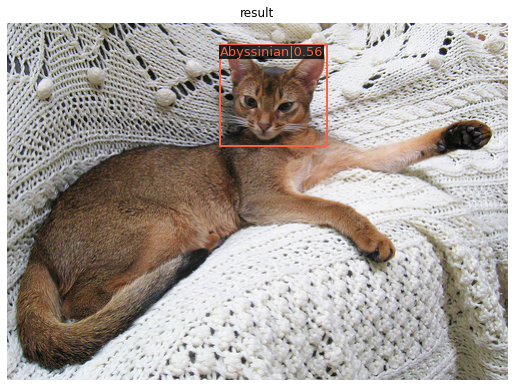

In [32]:
from mmdet.apis import inference_detector, init_detector,show_result_pyplot

img=cv2.imread('/content/data/images/Abyssinian_88.jpg')

model.cfg=cfg

result=inference_detector(model,img)
show_result_pyplot(model,img,result,score_thr=0.5)

In [33]:
result

[array([[212.84834   ,  22.510948  , 319.34525   , 123.566696  ,
           0.56302965]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[2.15755432e+02, 1.96698036e+01, 3.16019623e+02, 1.16065315e+02,
         2.77557105e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[2.19649536e+02, 1.63514748e+01, 3.16785797e+02, 1.23854485e+02,
         5.70388325e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[2.1979503e+02, 2.0559114e+01, 3.1495630e+02, 1.2193898e+02,
         2.0468962e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(

#### **Checkpoint 저장된 model 파일을 로딩하고 이를 이용하여 Inference 수행**

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


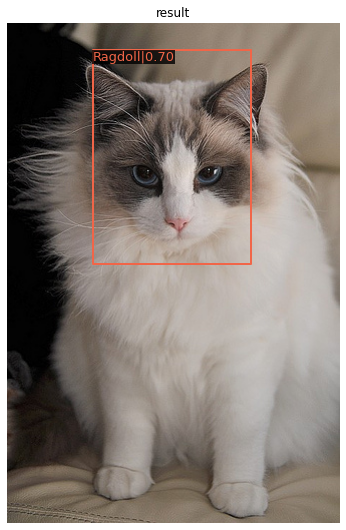

In [45]:
checkpoint_file='/content/drive/MyDrive/pet_work_dir/epoch_5.pth'

model_ckpt=init_detector(cfg,checkpoint_file,device='cuda:0')

img=cv2.imread('/content/data/images/Ragdoll_193.jpg')

result=inference_detector(model_ckpt,img)
show_result_pyplot(model_ckpt,img,result,score_thr=0.3)

#### **여러개의 image들을 Inference 수행**

In [46]:
val_df

,img_name,class_id,etc1,etc2,class_name
0,Abyssinian_100,1,1,1,Abyssinian
21,Abyssinian_11,1,1,1,Abyssinian
24,Abyssinian_122,1,1,1,Abyssinian
29,Abyssinian_127,1,1,1,Abyssinian
44,Abyssinian_140,1,1,1,Abyssinian
...,...,...,...,...,...
3649,yorkshire_terrier_163,37,2,25,yorkshire_terrier
3650,yorkshire_terrier_164,37,2,25,yorkshire_terrier
3651,yorkshire_terrier_165,37,2,25,yorkshire_terrier
3673,yorkshire_terrier_185,37,2,25,yorkshire_terrier


In [48]:
val_df['img_path']='/content/data/images/'+val_df['img_name']+'.jpg'
val_df.head()

,img_name,class_id,etc1,etc2,class_name,img_path
0,Abyssinian_100,1,1,1,Abyssinian,/content/data/images/Abyssinian_100.jpg
21,Abyssinian_11,1,1,1,Abyssinian,/content/data/images/Abyssinian_11.jpg
24,Abyssinian_122,1,1,1,Abyssinian,/content/data/images/Abyssinian_122.jpg
29,Abyssinian_127,1,1,1,Abyssinian,/content/data/images/Abyssinian_127.jpg
44,Abyssinian_140,1,1,1,Abyssinian,/content/data/images/Abyssinian_140.jpg


In [50]:
val_df[val_df['img_path'].str.contains('Abyssinian')]['img_path'].values

array(['/content/data/images/Abyssinian_100.jpg',
       '/content/data/images/Abyssinian_11.jpg',
       '/content/data/images/Abyssinian_122.jpg',
       '/content/data/images/Abyssinian_127.jpg',
       '/content/data/images/Abyssinian_140.jpg',
       '/content/data/images/Abyssinian_153.jpg',
       '/content/data/images/Abyssinian_158.jpg',
       '/content/data/images/Abyssinian_182.jpg',
       '/content/data/images/Abyssinian_190.jpg',
       '/content/data/images/Abyssinian_193.jpg'], dtype=object)

In [51]:
val_path=val_df[val_df['img_path'].str.contains('Abyssinian')]['img_path'].values
val_imgs=[cv2.imread(x) for x in val_path]

In [53]:
type(val_imgs),len(val_imgs),val_imgs[0].shape

(list, 10, (500, 394, 3))

In [55]:
results=inference_detector(model,val_imgs)

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [61]:
results[0]

[array([[131.03279   ,  81.25363   , 334.68564   , 282.56546   ,
           0.34931383]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[1.4459187e+02, 7.3327744e+01, 3.3566696e+02, 2.6331842e+02,
         2.0056252e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[1.4097395e+02, 7.7064865e+01, 3.2687335e+02, 2.7253937e+02,
         1.1065149e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[1.5227042e+02, 7.3465919e+01, 3.3237296e+02, 2.7269659e+02,
         1.5976614e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dty

In [74]:
for i in range(len(val_imgs)):
  show_result_pyplot(model_ckpt,val_imgs[i],results[i],score_thr=0.3)

Output hidden; open in https://colab.research.google.com to view.